In [5]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, DLinear
from sktime.utils import plot_series
from neuralforecast.utils import AirPassengersDF
import pandas as pd
import matplotlib.pyplot as plt

## Описание датасета
[Датасет](https://nixtlaverse.nixtla.io/statsforecast/src/utils.html#2-airpassengers-data)

Данные авиакомпании Box & Jenkins. Ежемесячное количество пассажиров международных авиалиний с 1949 по 1960 год. 
Длина серии: 144 Частота: Ежемесячно

In [6]:
Y_df = AirPassengersDF
Y_df

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0
...,...,...,...
139,1.0,1960-08-31,606.0
140,1.0,1960-09-30,508.0
141,1.0,1960-10-31,461.0
142,1.0,1960-11-30,390.0


In [9]:
def smp_plot_series(y_train_p, y_test_p, y_pred_p = None):
    if y_pred_p is None:
        plot_series(y_train_p, y_test_p, labels=["y_train", "y_test"])
    else:
        plot_series(y_train_p, y_test_p, y_pred_p, labels=["y_train", "y_test", "y_pred"])

Далее пару DL алгоритмов по примерам с офф документации

In [10]:
horizon = 12

In [16]:
models = [
    LSTM(h=horizon,
         max_steps=100,
         scaler_type='standard',
         encoder_hidden_size=128,
         decoder_hidden_size=128),
    NHITS(h=horizon,
          input_size=horizon,
          max_steps=100,
          n_freq_downsample=[1, 1, 1]),
    DLinear(h=horizon,
            input_size=horizon,
            max_steps=100,
            moving_avg_window=2 * (horizon // 2) + 1,
            val_check_steps=10)
]

Seed set to 1
Seed set to 1
Seed set to 1


In [12]:
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=Y_df)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Missing logger folder: C:\Users\Vlad\PycharmProjects\time_series\lightning_logs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 199 K  | train
4 | context_adapter | Linear        | 15.5 K | train
5 | mlp_decoder     | MLP           | 1.5 K  | train
----------------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.659     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | linear_trend  | Linear        | 156    | train
5 | linear_season | Linear        | 156    | train
--------------------------------------------------------
312       Trainable params
0         Non-trainable params
312       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.


In [13]:
Y_hat_df = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

C:\Program Files\Python311\Lib\site-packages\neuralforecast\core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


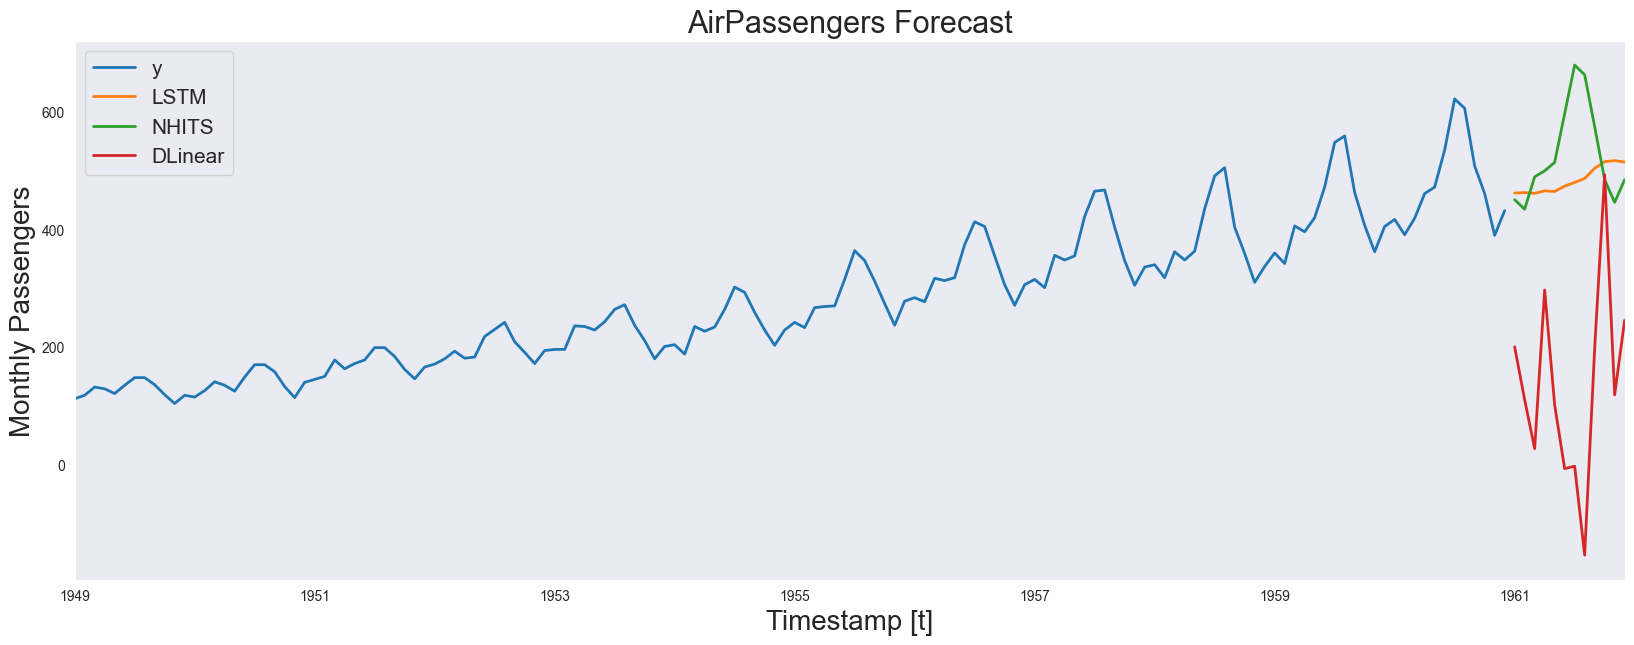

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM', 'NHITS', 'DLinear']].plot(ax=ax, linewidth=2)

ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()